<a href="https://colab.research.google.com/github/scumpustefania16/Tema1_IA/blob/main/Tema2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Renumim coloanele pentru consistență
df.columns = [
    "Relative_Compactness", "Surface_Area", "Wall_Area",
    "Roof_Area", "Overall_Height", "Orientation",
    "Glazing_Area", "Glazing_Area_Distribution",
    "Heating_Load", "Cooling_Load"
]

# Selectăm X = toate variabilele numerice, Y = Heating_Load
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
y = df["Heating_Load"]

X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
ridge_alpha = 10
lasso_alpha = 0.001

ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=ridge_alpha))
])

lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=lasso_alpha, max_iter=10000))
])

In [ ]:
def evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test  = np.sqrt(mean_squared_error(y_test,  y_pred_test))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test,  y_pred_test)

    print(f"===== {model_name} =====")
    print(f"RMSE Train: {rmse_train:.3f}")
    print(f"RMSE Test : {rmse_test:.3f}")
    print(f"R² Train : {r2_train:.3f}")
    print(f"R² Test  : {r2_test:.3f}")
    print("----------------------------")

    return rmse_test

In [ ]:
ridge_rmse = evaluate(ridge_model, "Ridge Regression")
lasso_rmse = evaluate(lasso_model, "Lasso Regression")

===== Ridge Regression =====
RMSE Train: 2.939
RMSE Test : 3.113
R² Train : 0.914
R² Test  : 0.907
----------------------------
===== Lasso Regression =====
RMSE Train: 2.893
RMSE Test : 3.026
R² Train : 0.917
R² Test  : 0.912
----------------------------


In [ ]:
def rmse_cv(model):
    mse = -cross_val_score(
        model,
        X, y,
        scoring="neg_mean_squared_error",
        cv=5
    )
    return np.sqrt(mse)

print("Ridge CV RMSE:", rmse_cv(ridge_model).mean())
print("Lasso CV RMSE:", rmse_cv(lasso_model).mean())

Ridge CV RMSE: 3.225311794333359
Lasso CV RMSE: 3.166495615191921


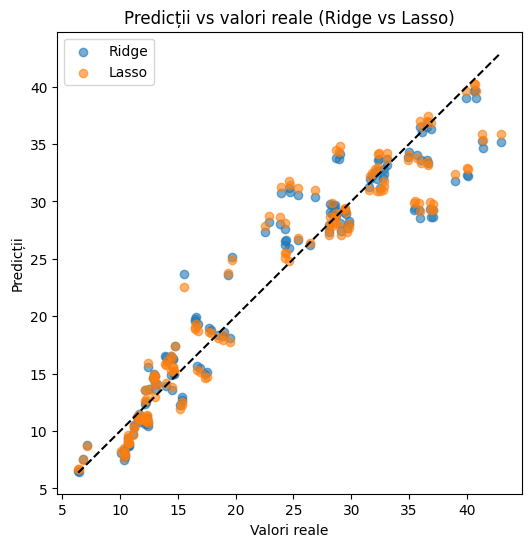

In [ ]:
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

pred_ridge = ridge_model.predict(X_test)
pred_lasso = lasso_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_ridge, alpha=0.6, label="Ridge")
plt.scatter(y_test, pred_lasso, alpha=0.6, label="Lasso")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "k--")
plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.legend()
plt.title("Predicții vs valori reale (Ridge vs Lasso)")
plt.show()

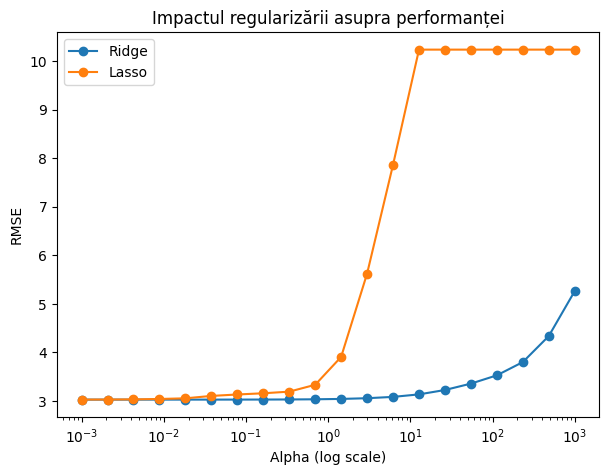

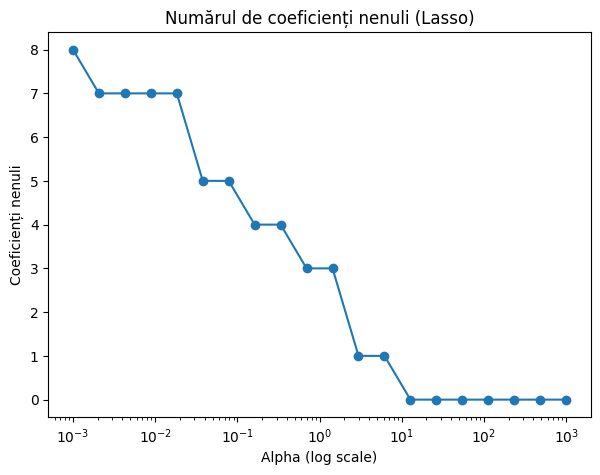

In [ ]:
alphas = np.logspace(-3, 3, 20)

ridge_rmse_alpha = []
lasso_rmse_alpha = []
lasso_nonzero = []

for a in alphas:
    # Ridge
    ridge = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=a))
    ])
    ridge.fit(X_train, y_train)
    ridge_rmse_alpha.append(
        np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    )

    # Lasso
    lasso = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=a, max_iter=10000))
    ])
    lasso.fit(X_train, y_train)
    lasso_rmse_alpha.append(
        np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    )
    lasso_nonzero.append(np.sum(lasso.named_steps["model"].coef_ != 0))

# Grafic RMSE în funcție de alpha
plt.figure(figsize=(7,5))
plt.plot(alphas, ridge_rmse_alpha, marker="o", label="Ridge")
plt.plot(alphas, lasso_rmse_alpha, marker="o", label="Lasso")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Impactul regularizării asupra performanței")
plt.legend()
plt.show()

# Sparsitatea Lasso
plt.figure(figsize=(7,5))
plt.plot(alphas, lasso_nonzero, marker="o")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coeficienți nenuli")
plt.title("Numărul de coeficienți nenuli (Lasso)")
plt.show()